# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Dataset

In [2]:
path="../input/sms-spam-collection-dataset/spam.csv"
data=pd.read_csv(path,encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Data Preprocessing

In [5]:
df=data[["v1",'v2']].copy()
df.rename(columns={'v1':'Class','v2':'sms'},inplace=True)
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

<AxesSubplot:xlabel='Class', ylabel='count'>

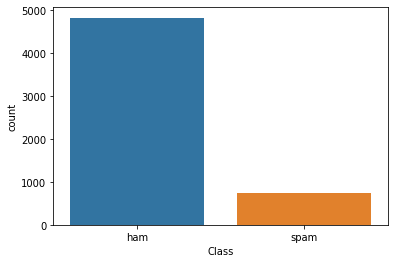

In [6]:
sns.countplot(x=df.Class)

### The dataset is imbalanced 

# Text preprocessing

In [7]:
import spacy
nlp=spacy.load('en')

## Tokenization

In [8]:
df["tokens"]=df.sms.apply(lambda x: nlp(x))
df.head()

,Class,sms,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,..."


# Lammatization after removing stopwords and punctuation

In [9]:
def stopword(txt):
    l=[]
    for tokens in txt:
        if not tokens.is_stop and not tokens.is_punct:
            l.append(tokens.lemma_.strip().lower())
    return l        
df['Lmnt_text']=df.tokens.apply(stopword) 
df.head()

,Class,sms,tokens,Lmnt_text
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail...","[jurong, point, crazy, available, bugis, n, gr..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, early, hor, u, c]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, think, go, usf, live]"


# Corpus of Lammatized text

In [10]:
def final_corpus(lmt):
    return (' '.join(lmt))
df['final_corpus']=df.Lmnt_text.apply(final_corpus)
df.head()

,Class,sms,tokens,Lmnt_text,final_corpus
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail...","[jurong, point, crazy, available, bugis, n, gr...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, early, hor, u, c]",u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, think, go, usf, live]",nah think go usf live


# Word Cloud

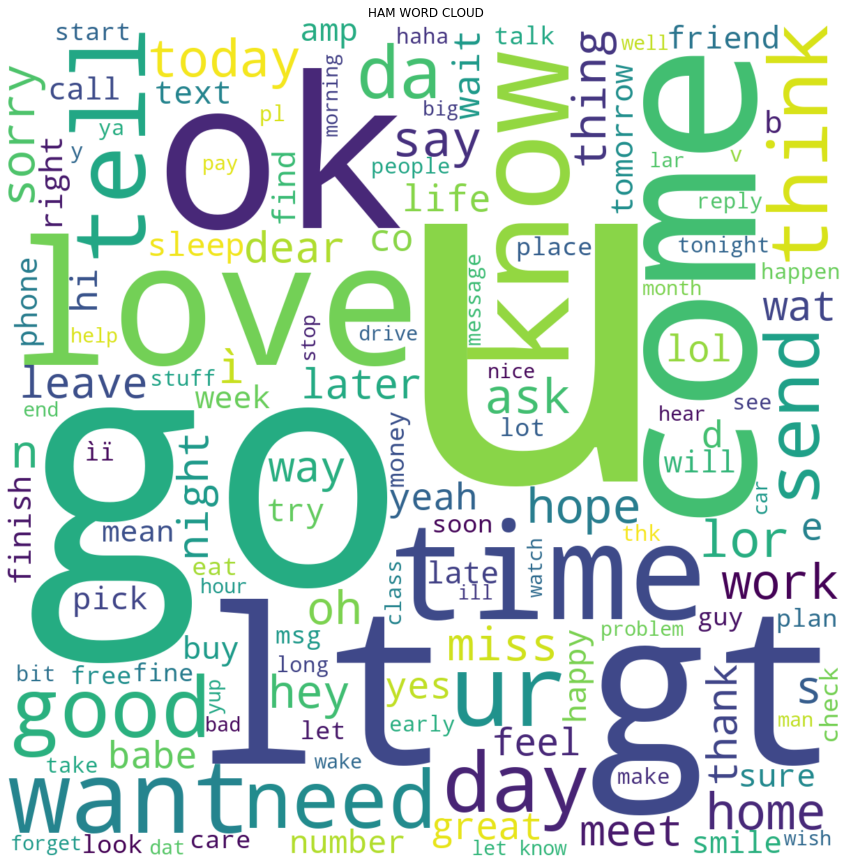

In [11]:
text = " ".join(r for r,s in zip(df.final_corpus.astype(str),df.Class) if s == 'ham')
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',contour_width=1, contour_color='green',
                min_font_size = 20).generate(text)
plt.figure(figsize=[15,20])
plt.title("HAM WORD CLOUD")
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')

# Frequently occuring words in Ham messages

In [12]:
from collections import Counter
f=Counter(text.split())
print(f.most_common(10))

[('u', 957), ('go', 343), ('come', 319), ('2', 307), ('not', 291), ('ok', 277), ('lt;#&gt', 276), ('get', 274), ('know', 259), ('good', 257)]


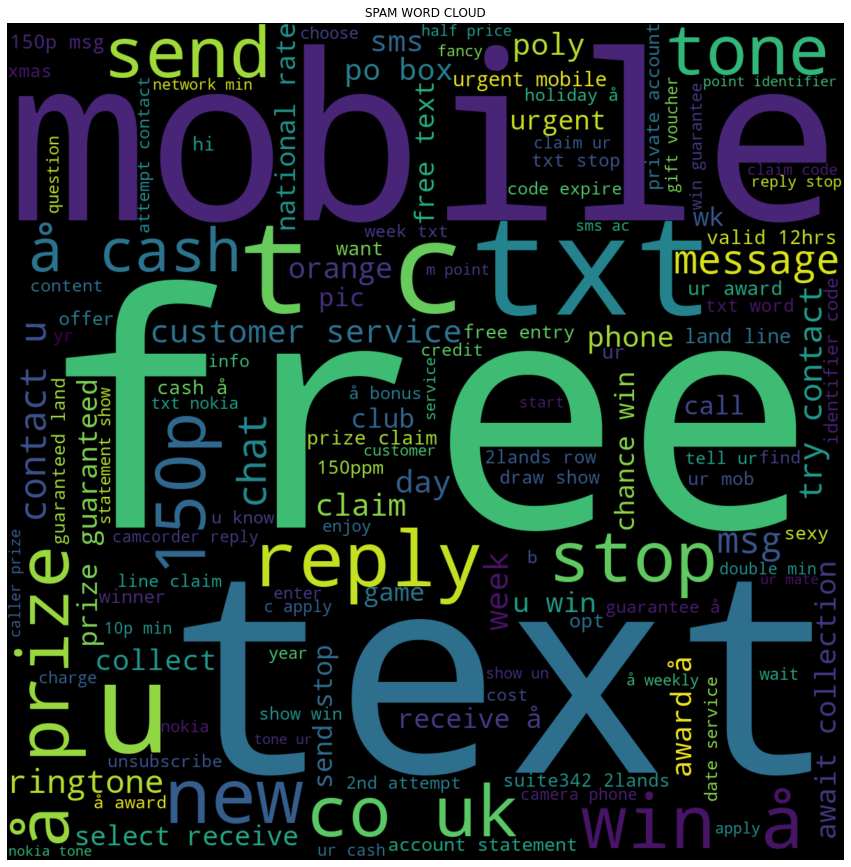

In [13]:
text = " ".join(r for r,s in zip(df.final_corpus.astype(str),df.Class) if s == 'spam')
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='black',contour_width=1, contour_color='green',
                min_font_size = 20).generate(text)
plt.figure(figsize=[15,20])
plt.title("SPAM WORD CLOUD")
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')

# Frequently occuring word in spam message

In [14]:
from collections import Counter
f=Counter(text.split())
print(f.most_common(10))

[('free', 223), ('2', 174), ('txt', 162), ('ur', 144), ('text', 142), ('u', 137), ('mobile', 136), ('win', 129), ('4', 121), ('stop', 116)]


# Vectorization

# TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=False)
X= tfidf.fit_transform(df.final_corpus).toarray()

# CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df.final_corpus).toarray()

# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, df.Class, test_size=0.30, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, df.Class, test_size=0.30, random_state=42)

# Model Building

In [18]:
Model=pd.DataFrame({"Model":[],"Accuracy":[],"Vectorizer":[]})
Model

,Model,Accuracy,Vectorizer


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_train1,y_train1)
score=lr.score(X_test1,y_test1)
Model=Model.append({"Model":"Logistic Regression","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
lr=LogisticRegression().fit(X_train2,y_train2)
score=lr.score(X_test2,y_test2)
Model=Model.append({"Model":"Logistic Regression","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector


# Decision Tree

In [20]:
from sklearn import tree
dt= tree.DecisionTreeClassifier().fit(X_train1, y_train1)
score=dt.score(X_test1,y_test1)
Model=Model.append({"Model":"Decision Tree","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
dt=tree.DecisionTreeClassifier().fit(X_train2,y_train2)
score=dt.score(X_test2,y_test2)
Model=Model.append({"Model":"Decision Tree","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector


# Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42).fit(X_train1, y_train1)
score=rf.score(X_test1,y_test1)
Model=Model.append({"Model":"Random Forest","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
rf=RandomForestClassifier(random_state=42).fit(X_train2,y_train2)
score=rf.score(X_test2,y_test2)
Model=Model.append({"Model":"Random Forest","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector


# K-nearest Neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier
for r in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=r).fit(X_train1, y_train1)
    print(r,knn.score(X_test1,y_test1))

1 0.9503588516746412
3 0.9234449760765551
5 0.9126794258373205
7 0.90311004784689
9 0.8965311004784688
11 0.888755980861244
13 0.8779904306220095
15 0.8738038277511961
17 0.8708133971291866
19 0.8702153110047847


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train1, y_train1)
score=knn.score(X_test1,y_test1)
Model=Model.append({"Model":"KNN","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train2,y_train2)
score=knn.score(X_test2,y_test2)
Model=Model.append({"Model":"KNN","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 


,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector


# Naive Bayes

## For tfidf

In [24]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB,BernoulliNB
mnb = MultinomialNB().fit(X_train1, y_train1).score(X_test1,y_test1)
gnb = GaussianNB().fit(X_train1,y_train1).score(X_test1,y_test1)
cnb = ComplementNB().fit(X_train1,y_train1).score(X_test1,y_test1)
bnb = BernoulliNB().fit(X_train1,y_train1).score(X_test1,y_test1)

In [25]:
naive_bayes=pd.DataFrame({"Classifier":["GaussianNB","MultinomialNB","ComplementNB","BernoulliNB"],
                          "Score":[gnb,mnb,cnb,bnb]})
Model=Model.append({"Model":"Naive Bayes","Accuracy":mnb,"Vectorizer":"tfidf"},ignore_index=True)
naive_bayes

,Classifier,Score
0,GaussianNB,0.856459
1,MultinomialNB,0.965311
2,ComplementNB,0.940191
3,BernoulliNB,0.975478


## For CountVector

In [26]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB,BernoulliNB
mnb = MultinomialNB().fit(X_train2, y_train2).score(X_test2,y_test2)
gnb = GaussianNB().fit(X_train2,y_train2).score(X_test2,y_test2)
cnb = ComplementNB().fit(X_train2,y_train2).score(X_test2,y_test2)
bnb = BernoulliNB().fit(X_train2,y_train2).score(X_test2,y_test2)

In [27]:
naive_bayes1=pd.DataFrame({"Classifier":["GaussianNB","MultinomialNB","ComplementNB","BernoulliNB"],
                          "Score":[gnb,mnb,cnb,bnb]})
naive_bayes1

,Classifier,Score
0,GaussianNB,0.856459
1,MultinomialNB,0.977871
2,ComplementNB,0.939593
3,BernoulliNB,0.975478


## Multinomial Naive Bayes yields better result

In [28]:
Model=Model.append({"Model":"Naive Bayes","Accuracy":mnb,"Vectorizer":"CountVector"},ignore_index=True)
Model

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector
8,Naive Bayes,0.965311,tfidf
9,Naive Bayes,0.977871,CountVector


# Support Vector Machine

In [29]:
from sklearn import svm
for r in ['linear' , 'poly', 'rbf', 'sigmoid']:
    sv=svm.SVC(kernel=r).fit(X_train1,y_train1).score(X_test1,y_test1)
    print(r,sv)

linear 0.9760765550239234
poly 0.937799043062201
rbf 0.9742822966507177
sigmoid 0.97188995215311


In [30]:
from sklearn import svm
for r in ['linear' , 'poly', 'rbf', 'sigmoid']:
    sv=svm.SVC(kernel=r).fit(X_train2,y_train2).score(X_test2,y_test2)
    print(r,sv)

linear 0.9796650717703349
poly 0.9425837320574163
rbf 0.979066985645933
sigmoid 0.9712918660287081


In [31]:
from sklearn import svm
sv=svm.SVC(kernel='linear').fit(X_train1,y_train1)
score=sv.score(X_test1,y_test1)
Model=Model.append({"Model":"SVM","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
sv = svm.SVC(kernel="linear").fit(X_train2,y_train2)
score=sv.score(X_test2,y_test2)
Model=Model.append({"Model":"SVM","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector
8,Naive Bayes,0.965311,tfidf
9,Naive Bayes,0.977871,CountVector


# Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier
for r in [ 'hinge', 'log', 'modified_huber']:
    sgd=SGDClassifier(loss=r).fit(X_train1,y_train1).score(X_test1,y_test1)
    print(r,sgd)

hinge 0.9754784688995215
log 0.9659090909090909
modified_huber 0.9784688995215312


In [33]:
from sklearn.linear_model import SGDClassifier
for r in [ 'hinge', 'log', 'modified_huber']:
    sgd=SGDClassifier(loss=r).fit(X_train2,y_train2).score(X_test2,y_test2)
    print(r,sgd)

hinge 0.9820574162679426
log 0.979066985645933
modified_huber 0.9808612440191388


In [34]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge').fit(X_train1,y_train1)
score=sgd.score(X_test1,y_test1)
Model=Model.append({"Model":"Stochastic Gradient Descent","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
sgd = SGDClassifier(loss="hinge").fit(X_train2,y_train2)
score=sgd.score(X_test2,y_test2)
Model=Model.append({"Model":"Stochastic Gradient Descent","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 


,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector
8,Naive Bayes,0.965311,tfidf
9,Naive Bayes,0.977871,CountVector


# XGBoost 

In [35]:
import xgboost as xgb
xg=xgb.XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=True).fit(X_train1, y_train1)
score=xg.score(X_test1,y_test1) 
Model=Model.append({"Model":"XGBoost","Accuracy":score,"Vectorizer":"tfidf"},ignore_index=True)
xg=xgb.XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=True).fit(X_train2, y_train2)
score=xg.score(X_test2,y_test2)
Model=Model.append({"Model":"XGBoost","Accuracy":score,"Vectorizer":"CountVector"},ignore_index=True)
Model 


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector
8,Naive Bayes,0.965311,tfidf
9,Naive Bayes,0.977871,CountVector


# Artificial neural network 

In [36]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
            layers.Dense(units=6, activation='relu'), 
            layers.Dense(units=6, activation='relu'),  
            layers.Dense(units=1, activation='sigmoid')])  

In [37]:
model.compile(
optimizer='adamax',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [38]:
stop=keras.callbacks.EarlyStopping(
patience=10,
min_delta=0.01,
restore_best_weights=True)

history=model.fit(
    X_train2,y_train2.replace({"ham":0,"spam":1}),
    validation_data=(X_test2,y_test2.replace({"ham":0,"spam":1})),
    batch_size=32,
    epochs=100,
    callbacks=[stop])

Epoch 1/100
122/122 [==============================] - 3s 12ms/step - loss: 0.6624 - binary_accuracy: 0.7569 - val_loss: 0.5411 - val_binary_accuracy: 0.8959
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 0.4949 - binary_accuracy: 0.9083 - val_loss: 0.3682 - val_binary_accuracy: 0.9318
Epoch 3/100
122/122 [==============================] - 1s 5ms/step - loss: 0.3288 - binary_accuracy: 0.9395 - val_loss: 0.2391 - val_binary_accuracy: 0.9462
Epoch 4/100
122/122 [==============================] - 1s 5ms/step - loss: 0.2051 - binary_accuracy: 0.9560 - val_loss: 0.1661 - val_binary_accuracy: 0.9605
Epoch 5/100
122/122 [==============================] - 1s 5ms/step - loss: 0.1304 - binary_accuracy: 0.9748 - val_loss: 0.1267 - val_binary_accuracy: 0.9701
Epoch 6/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0991 - binary_accuracy: 0.9770 - val_loss: 0.1052 - val_binary_accuracy: 0.9707
Epoch 7/100
122/122 [==============================] - 1s

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 45714     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 45,763
Trainable params: 45,763
Non-trainable params: 0
_________________________________________________________________


Best Validation Loss: 0.0676
Best Validation Accuracy: 0.9833


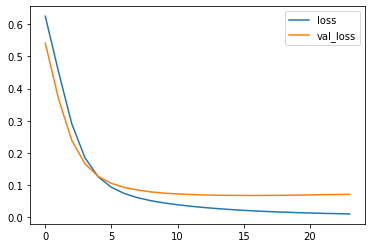

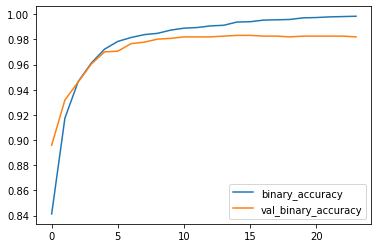

In [40]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [41]:
Model=Model.append({"Model":"Artificial Neural Network","Accuracy":history_df['val_binary_accuracy'].max(),"Vectorizer":"CountVector"},ignore_index=True)
Model

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector
8,Naive Bayes,0.965311,tfidf
9,Naive Bayes,0.977871,CountVector


In [42]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
            layers.Dense(units=6, activation='relu'), 
            layers.Dense(units=6, activation='relu'),  
            layers.Dense(units=1, activation='sigmoid')])
model.compile(
optimizer='adamax',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])
stop=keras.callbacks.EarlyStopping(
patience=10,
min_delta=0.01,
restore_best_weights=True)

history=model.fit(
    X_train1,y_train1.replace({"ham":0,"spam":1}),
    validation_data=(X_test1,y_test1.replace({"ham":0,"spam":1})),
    batch_size=32,
    epochs=100,
    callbacks=[stop])

Epoch 1/100
122/122 [==============================] - 1s 7ms/step - loss: 0.6577 - binary_accuracy: 0.8221 - val_loss: 0.5477 - val_binary_accuracy: 0.8690
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 0.5130 - binary_accuracy: 0.8647 - val_loss: 0.4222 - val_binary_accuracy: 0.8690
Epoch 3/100
122/122 [==============================] - 1s 5ms/step - loss: 0.4003 - binary_accuracy: 0.8639 - val_loss: 0.3460 - val_binary_accuracy: 0.8690
Epoch 4/100
122/122 [==============================] - 1s 5ms/step - loss: 0.3293 - binary_accuracy: 0.8659 - val_loss: 0.3008 - val_binary_accuracy: 0.8690
Epoch 5/100
122/122 [==============================] - 1s 5ms/step - loss: 0.2775 - binary_accuracy: 0.8717 - val_loss: 0.2654 - val_binary_accuracy: 0.8714
Epoch 6/100
122/122 [==============================] - 1s 5ms/step - loss: 0.2523 - binary_accuracy: 0.8707 - val_loss: 0.2322 - val_binary_accuracy: 0.8977
Epoch 7/100
122/122 [==============================] - 1s 

Best Validation Loss: 0.0763
Best Validation Accuracy: 0.9797


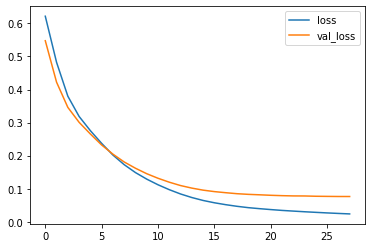

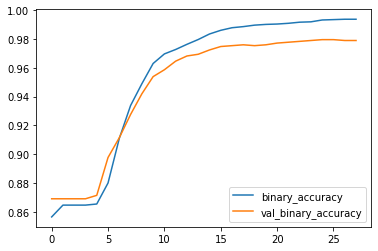

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [44]:
Model=Model.append({"Model":"Artificial Neural Network","Accuracy":history_df['val_binary_accuracy'].max(),"Vectorizer":"tfidf"},ignore_index=True)
Model

,Model,Accuracy,Vectorizer
0,Logistic Regression,0.955742,tfidf
1,Logistic Regression,0.978469,CountVector
2,Decision Tree,0.971890,tfidf
3,Decision Tree,0.973086,CountVector
4,Random Forest,0.976675,tfidf
5,Random Forest,0.974282,CountVector
6,KNN,0.923445,tfidf
7,KNN,0.924641,CountVector
8,Naive Bayes,0.965311,tfidf
9,Naive Bayes,0.977871,CountVector


# Selection of State of The Art Model

In [45]:
Model.sort_values(by=['Accuracy'],ascending=False)

,Model,Accuracy,Vectorizer
16,Artificial Neural Network,0.983254,CountVector
13,Stochastic Gradient Descent,0.980861,CountVector
17,Artificial Neural Network,0.979665,tfidf
12,Stochastic Gradient Descent,0.979665,tfidf
11,SVM,0.979665,CountVector
1,Logistic Regression,0.978469,CountVector
9,Naive Bayes,0.977871,CountVector
4,Random Forest,0.976675,tfidf
10,SVM,0.976077,tfidf
14,XGBoost,0.976077,tfidf


In [46]:
Model.groupby(["Vectorizer",'Model']).min()

Accuracy
Vectorizer  Model                                
CountVector Artificial Neural Network    0.983254
            Decision Tree                0.973086
            KNN                          0.924641
            Logistic Regression          0.978469
            Naive Bayes                  0.977871
            Random Forest                0.974282
            SVM                          0.979665
            Stochastic Gradient Descent  0.980861
            XGBoost                      0.975478
tfidf       Artificial Neural Network    0.979665
            Decision Tree                0.971890
            KNN                          0.923445
            Logistic Regression          0.955742
            Naive Bayes                  0.965311
            Random Forest                0.976675
            SVM                          0.976077
            Stochastic Gradient Descent  0.979665
            XGBoost                      0.976077

# Stochastic Gradient Descent algorithm with count vectorization of corpus yields maximum of accuracy

# Building State Of The Art Model

In [47]:
from sklearn.linear_model import SGDClassifier
final_model=SGDClassifier(loss='hinge')
final_model.fit(X_train2,y_train2)
final_model.score(X_test2,y_test2)

0.9832535885167464

# Confusion Matrix

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, final_model.predict(X_test2)))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



[[1450    3]
 [  25  194]]


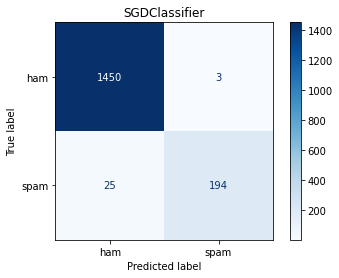

In [49]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(final_model, X_test2, y_test2,
                                 display_labels=['ham','spam'],
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('SGDClassifier')
print(disp.confusion_matrix)
plt.show()

# Save the trained model for future use

In [50]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

# Building the pipeline for the prediction

# Load the Model

In [51]:
load_model = pickle.load(open(filename, 'rb'))

In [52]:
import spacy
nlp=spacy.load('en')
def prediction(text):
    doc=nlp(text)
    lt=[]
    for tokens in doc:
        if not tokens.is_stop and not tokens.is_punct:
            lt.append(tokens.lemma_.strip().lower())
    corpus= ' '.join(lt) 
    f_vct = cv.transform([corpus]).toarray()
    pred=final_model.predict(f_vct)[0]
    return pred
    

# Prediction

In [53]:
text="Free tones Hope you enjoyed your new content"
output=prediction(text)
print(f"The sms is {output}")

The sms is spam
